# Exercise 1 (Checking a directed graph for cycles)

First implement a graph class in Python, and learn about a simple way of visualizing graphs. You will then write code for detecting cycles in graph, and highlighting them in the visualization.

a) Write a Python class that represents directed graphs with an adjacency list implementation. Your class should provide the following functionality: (5P)

• Adding nodes

• Adding edges

• Deleting nodes

• Deleting edges

• For a given node, iterating over all successor nodes

In [6]:
class Graph():
    '''in the first class, firstly initialize an empty adjacency list, 
    and manually adding nodes, edges, deleting nodes, and edges. 
    For a given node, using for loop to iterate successor nodes in responding list'''
    

    def __init__(self):
        self.vertice_list = {}
        self.edge_list = []


    def add_node(self, m):
        self.vertice_list[m] = []

    def add_edge(self, v, x):
        self.edge_list.append((v, x))
        if v not in self.vertice_list.keys():
            self.vertice_list[v] = []
        if x not in self.vertice_list.keys():
            self.vertice_list[x] = []
        self.vertice_list[v].append(x)

    def delete_node(self, m):
        if m in self.vertice_list.keys():
            del self.vertice_list[m]
            for elem in self.vertice_list:
                if m in self.vertice_list[elem]:
                    vertice_list[elem].remove(m)
        else:
            raise KeyError('there is no {} in this graph.'.format(m))

    def delete_edge(self, v, x):
        #if len(self.vertice_list[v]) == 1 and list(self.vertice_list.values()).count(v) == 0:
        assert v in self.vertice_list.keys()
        assert x in self.vertice_list[v]
        self.vertice_list[v].remove(x)
        self.edge_list.remove((v,x))

    def iter_edge(self, m):
        list_iter = []
        for v in self.vertice_list[m]:
            list_iter.append(v)
        return list_iter


    def __repr__(self):
        return str(self.vertice_list)
    

if __name__ == '__main__':
    g = Graph()
    
    g.add_node('a')
    g.add_node('b')
    g.add_node('c')
    
    g.add_edge('a','c')
    g.add_edge('a','g')
    g.add_edge('c','m')
    g.add_edge('v','h')
    g.add_edge('v','k')
    
    g.delete_node('a')
    g.delete_edge('c','m')
    
    print('The graph showed in adjacency list: ', repr(g))
    print(g.iter_edge('v'))
    print(g.edge_list)






    

The graph showed in adjacency list:  {'b': [], 'c': [], 'g': [], 'm': [], 'v': ['h', 'k'], 'h': [], 'k': []}
['h', 'k']
[('a', 'c'), ('a', 'g'), ('v', 'h'), ('v', 'k')]


b)Modify the __init__ function of your graph class so that it can optionally initialize an instance based on the information given in a text ﬁle, which has the following format:

• The ﬁrst line contains a single nonnegative integer number, which speciﬁes the overall number of nodes in the graph.

• Each of the remaining lines contains two nonnegative integers i and j, separated by a space.

They represent an edge (i, j), where node indices start at zero.

We provide two example ﬁles in this format, graph-06.txt and graph-20.txt. (2P)

c)The Python library graphviz can be used for graph visualization. If you do not have it in your current environment, please install it (e.g., via pip) and read its instructions. Based on this, write a function that can produce a basic visualization of a graph represented as an object of your class. (3P)

d) Add a function to your graph class that detects whether or not the graph is acyclic. If the graph is not acyclic, your function should prove this by returning a cycle, as a list of nodes. (4P) Modify your visualization so that, if a cycle has been found, it is highlighted visually. Try this out on the two graphs graph-06.txt and graph-20.txt. (1P) Figure 1 shows an example result.

In [5]:
from graphviz import *

class Graph():
    '''in the modified class, except for the __init__ function, another two main methods are added.
    including visulization and check_cycle using DFS traversal.'''

    def __init__(self, path = False):
        self.path = path
        # modify __init__ function here: if there is file path, then implement the following steps
        if self.path:
            self.file = []

            with open(path, 'r') as g_file:
                for line in g_file:
                    self.file.append(line.split())
                    self.edge_list = self.file[1:]

                    self.vertice_list = {}
                    for key, value in self.edge_list:
                        self.vertice_list.setdefault(key, []).append(value)
                        
        elif not self.path:
            self.vertice_list = {}
            self.edge_list = []


    def add_node(self, m):
        self.vertice_list[m] = []

    def add_edge(self, v, x):
        self.edge_list.append((v, x))
        if v not in self.vertice_list.keys():
            self.vertice_list[v] = []
        if x not in self.vertice_list.keys():
            self.vertice_list[x] = []
        self.vertice_list[v].append(x)

    def delete_node(self, m):
        if m in self.vertice_list.keys():
            del self.vertice_list[m]
            for elem in self.vertice_list:
                if m in self.vertice_list[elem]:
                    vertice_list[elem].remove(m)
        else:
            raise KeyError('there is no {} in this graph.'.format(m))

    def delete_edge(self, v, x):
        assert v in self.vertice_list.keys()
        assert x in self.vertice_list[v]
        self.vertice_list[v].remove(x)
        self.edge_list.remove((v,x))

    def iter_edge(self, m):
        list_iter = []
        for v in self.vertice_list[m]:
            list_iter.append(v)
        return list_iter

    def visualize(self):
        f = Digraph(comment = 'none',format = 'png')
        f.attr(size = '8,5')
        f.attr('node', shape = 'circle')
        for key in list(self.vertice_list.keys()):
            f.node(key)
            f.view()
        for node1, node2 in self.edge_list:
            if node1 not in self.route and node2 not in self.route:
                f.edge(node1, node2, color = 'black', constraint = 'True')
            elif node1 in self.route and node2 not in self.route:
                f.edge(node1, node2, color = 'black', constraint = 'True')
            elif node1 not in self.route and node2 in self.route:
                f.edge(node1, node2, color = 'black', constraint = 'True')
            else:
                f.edge(node1, node2, color = 'red', constraint = 'True')
            f.view()
            print(f.source)
            f.render(filename = 'my_picture_06', directory = '/Users/wangdanqi/Desktop', view = True)


    def check_cycle(self, node, visited):
        '''if there is cycle, the node was already in the visited list, 
        print out the cycle from the index to the end, and append the node at last, 
        then generates the cycle list.'''
        self.visited = visited
         
        if node in self.visited: 
            i = self.visited.index(node)
            self.route = self.visited[i:]
            self.route.append(node)
            print('Cycle found! The cycle route is: ', self.route)

        # use DFS recursion to find cycle.
        elif node not in self.visited:
            self.visited.append(node)
            
            if node not in self.vertice_list: # leaf node
                return self.visited

            for neighbour in self.vertice_list[node]:
                self.check_cycle(neighbour, visited)
                break

    def __repr__(self):
        return str(self.vertice_list)


if __name__ == '__main__':
    path1 = '/Users/wangdanqi/Desktop/graph-06.txt'
    path2 = '/Users/wangdanqi/Desktop/graph-20.txt'
    
    g = Graph(path1)
    
    print('Graph: ', str(g)) 
    print(g.check_cycle('0', []))
    print(g.visualize())






    

Graph:  {'0': ['1'], '1': ['2'], '2': ['4', '5'], '3': ['2'], '4': ['3'], '5': ['3']}
Cycle found! The cycle route is:  ['2', '4', '3', '2']
None
['2', '4', '3', '2']


The visualization graph from graph-06.txt

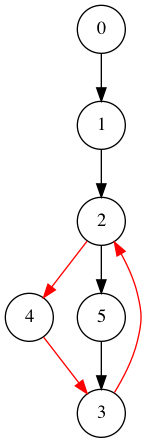

The visualization graph from graph-20.txt

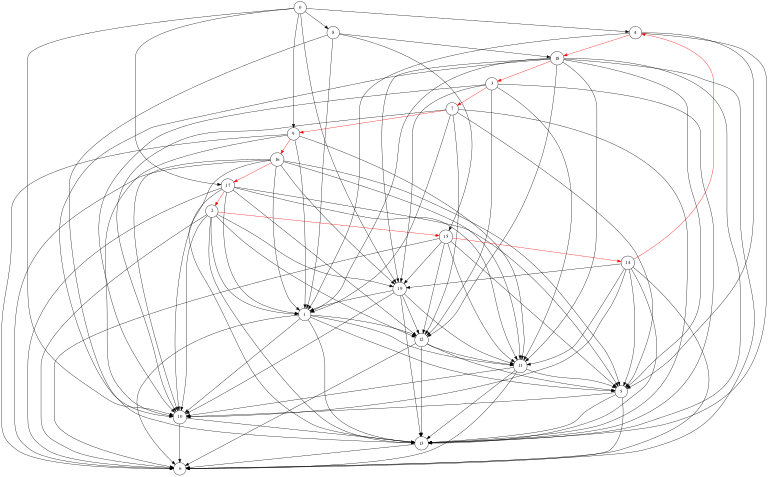

# Exercise 2 (Bipartite Graphs, 6 Points)

A graph G = (V, E) is called a bipartite graph if its vertex set V can be partitioned into two sets V1  and V 2 so that V 1 , V 2 = ̸ ∅ , V 1 ∪ V 2 = V , V 1 ∩ V 2 = ∅ , and so that there are no edges within V 1 or V 2 , i.e., all edges connect a node from V 1 to a node from V 2 or vice versa.

Please provide pseudocode that, for a given undirected graph G in adjacency list representation, checks whether G is bipartite. If it is bipartite, your algorithm should also output a valid split of V into V 1 and V 2 that satisﬁes all above-mentioned conditions. Please specify the asymptotic running time of your algorithm in terms of the numbers of nodes and edges.

In [ ]:
#pseudocode
def bipartite(G):
    for u in G.V: #set color of all node in V to white
        u.color=white
        u.pi=None
    s=random() in G.V #randomly select a node s from V and add it to q
    s.color=green #set the color of s to green
    for u in G.V:
        if u==s: #make s the first node in V, then traverse all the nodes in V
            u.color=green
            V1,V2=visit(G,u)
    return V1,V2 if len(V1)+len(V2)==len(G.V) 
    #while the overall number of nodes in V1 and V2 equals that of V, return V1&V2




def visit(G,u,Green=[],Blue=[]):
    for v in G.adj(u):
        if v.color==white and u.color==green: #if v is not colored, then set it to a different color as u
            v.color=blue
            v.pi=u
            Green.add(u)#seperate nodes by their colors
            Blue.add(v)
            visit(G,v,Green,Blue)
        if v.color==white and u.color==blue:
            v.color=green
            v.pi=u
            Green.add(v)
            Blue.add(u)
            visit(G,v,Green,Blue)
        if v.color==u.color: #while v and u have a same color, the given graph is not a bipartite graph,raise an error and break
            raise 'This graph is not a bipartite graph!'
            break
    return Green,Blue


Asymptotic running time:O(|V|+|E|)

# Exercise 3 (Breadth First Trees, 4 Points)

Draw two breadth-ﬁrst trees of the graph shown below. The ﬁrst tree should have node 1 as its root, the second one node 3.

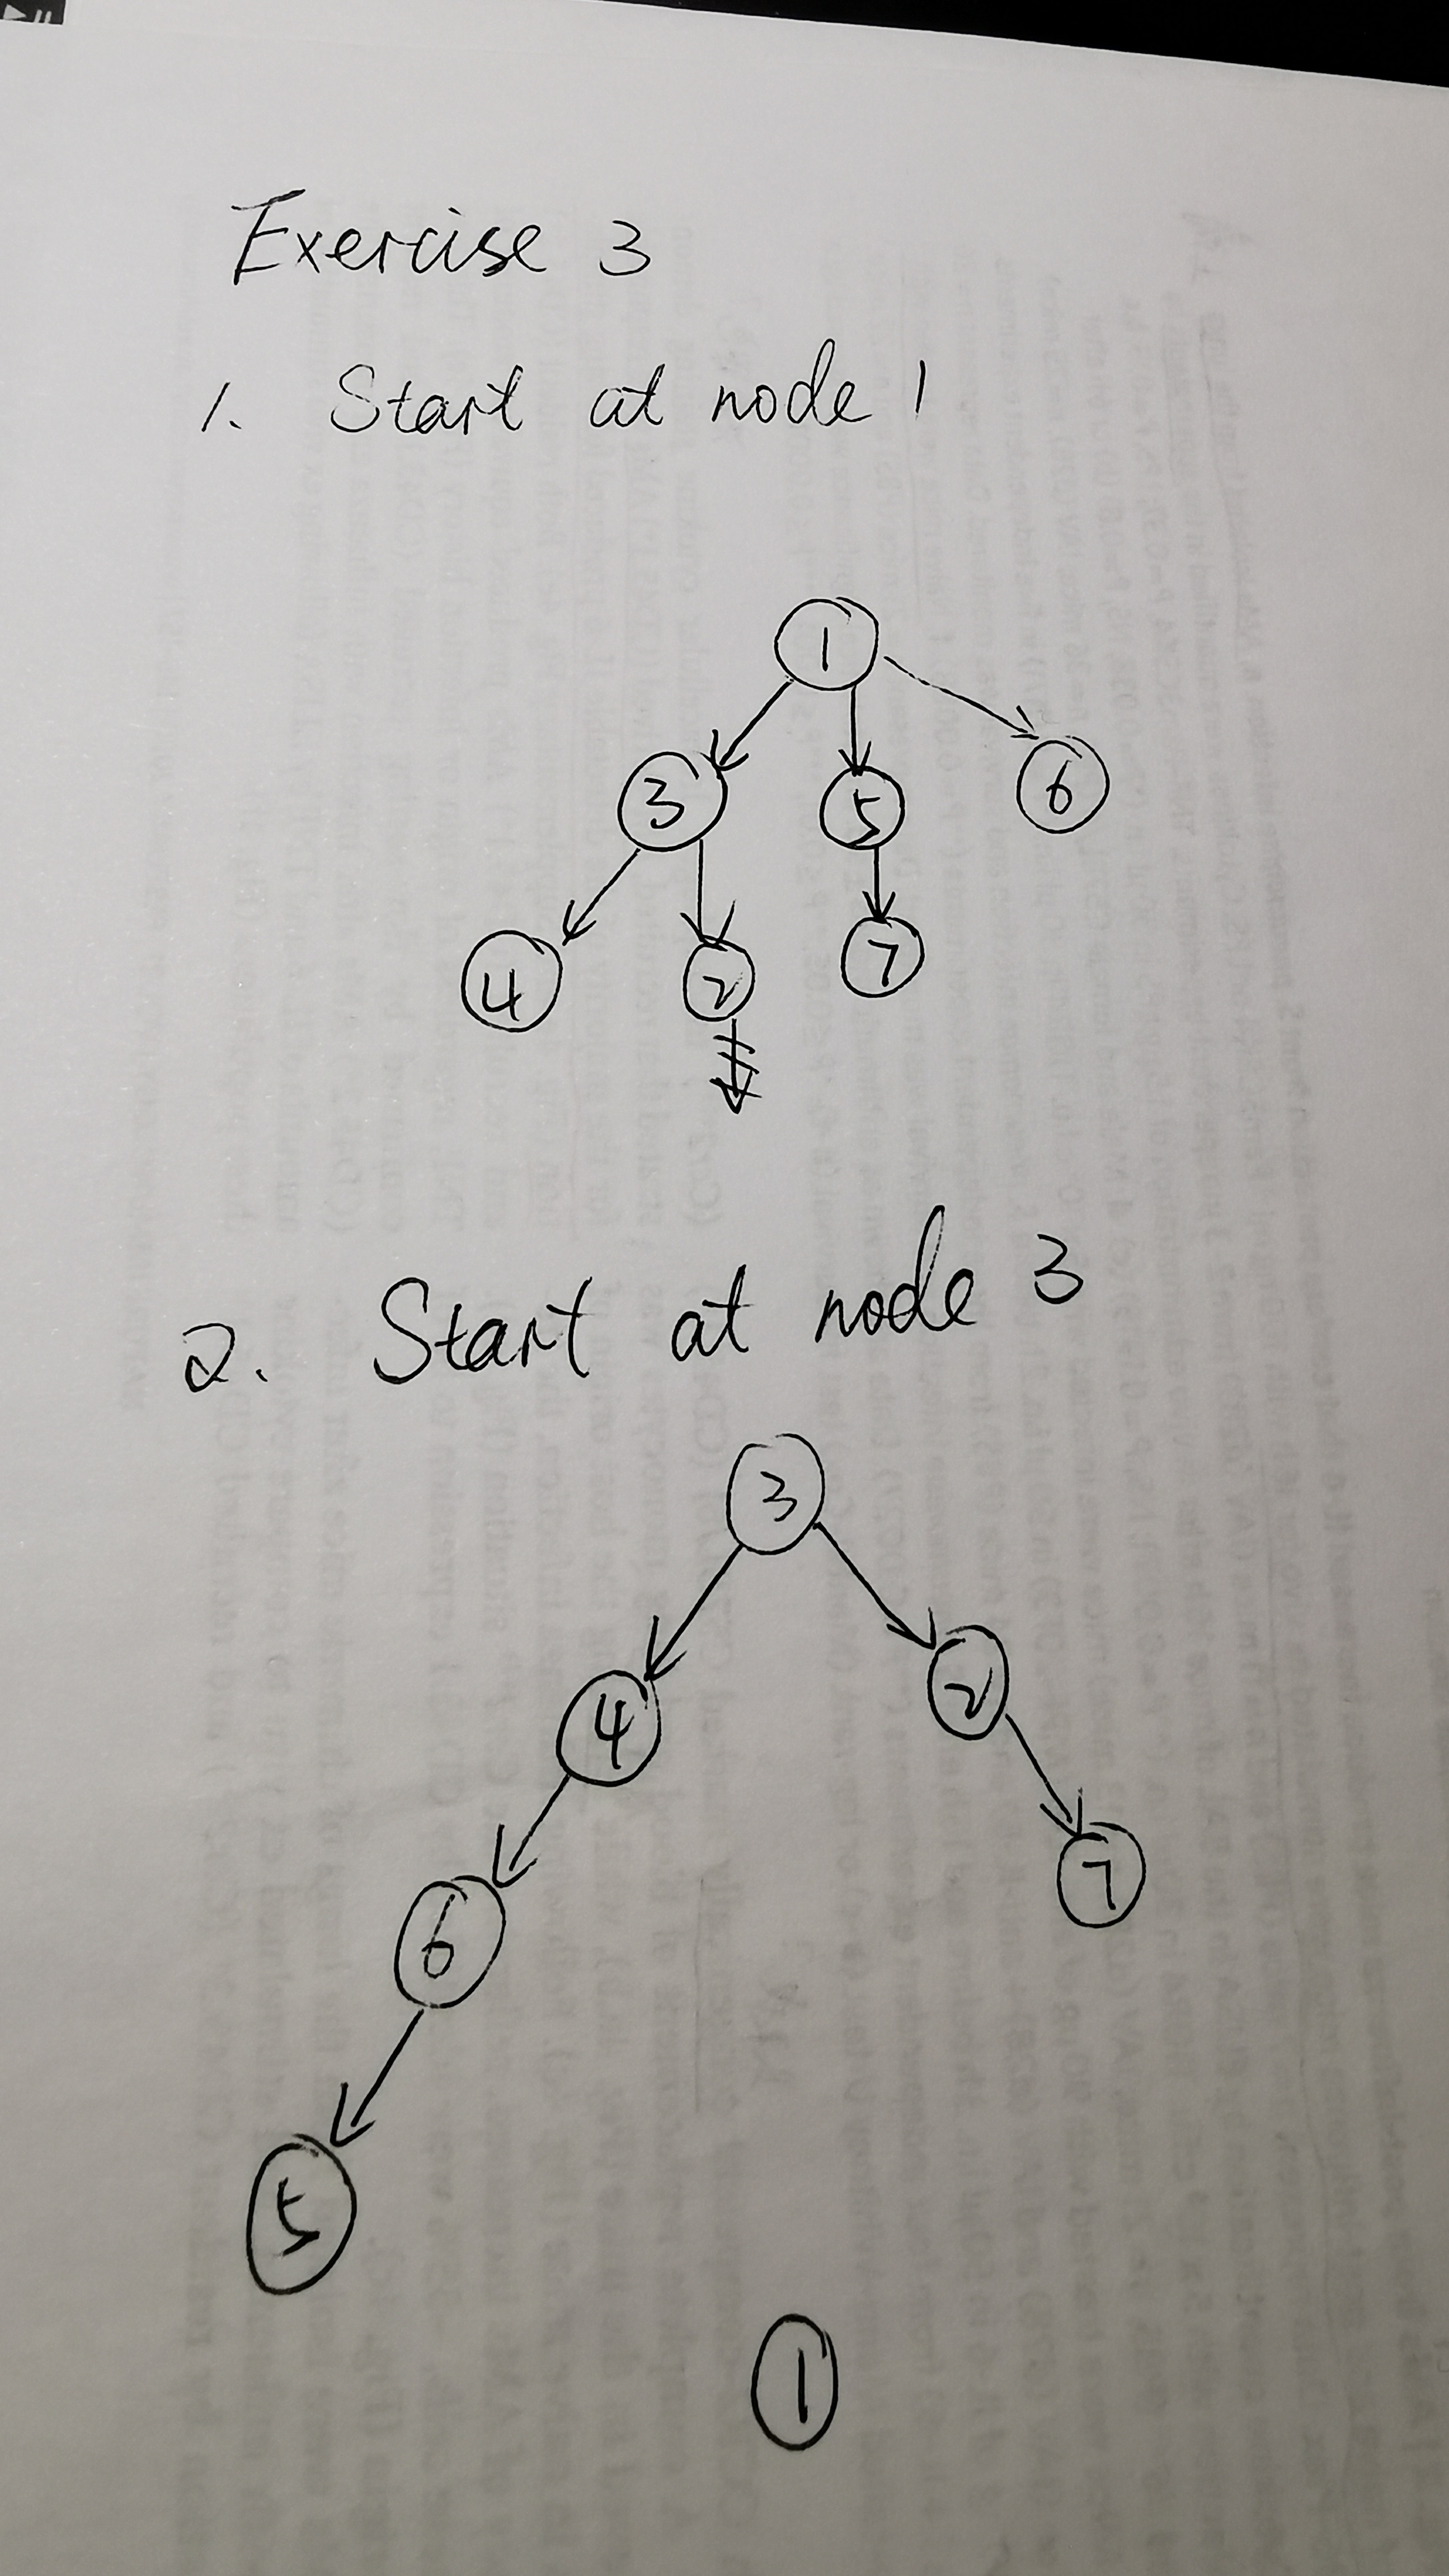